# <font color='red'>Ce code entraîne et évalue un réseau de neurones simple </br> pour reconnaître le nombre 5 dans les images de l'ensemble de données MNIST</font>

### Les bibliothèques nécessaires sont importées.

In [68]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [69]:
# import the dataset
# x is the images, y is the corresponding label of each image
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train[x_train < 127] = 1
x_train[x_train >= 127] = 0

x_test[x_test < 127] = 1
x_test[x_test >= 127] = 0

In [70]:
def Divide_By_4(img):
    h, w = img.shape

    half = w // 2

    top_right = img[:half, :half] 
    top_left = img[:half, half:] 
    bottom_right = img[half:, :half] 
    bottom_left = img[half:, half:]

    return top_right, top_left, bottom_right, bottom_left

def Divide_By_4_Again(img):
    tr, tl, br, bl = Divide_By_4(img)
    image_reformed = Divide_By_4(tr), Divide_By_4(tl), Divide_By_4(br), Divide_By_4(bl)
    image_reformed = np.asarray(image_reformed)
    image_reformed = image_reformed.reshape(16, 7, 7)
    return image_reformed

In [71]:
def reformulate_Mnist_With_Percentage(x):
    data = []
    for i in x:
        img = Divide_By_4_Again(i)
        img_percent = []
        for j in range(16):
            blacks = 0
            for k in range(7):
                for l in range(7):
                    if(img[j][k][l] == 0):
                        blacks += 1
            img_percent.append((blacks / 49) * 100)
        data.append(img_percent)
    return data

reformed_x_train = reformulate_Mnist_With_Percentage(x_train)
reformed_x_test = reformulate_Mnist_With_Percentage(x_test)

### Modifier les étiquettes pour qu'elles soient binaires : 1 si l'image est un 5, 0 sinon

In [72]:
#1 si l'image est un 5, 0 sinon
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

reformed_x_train = np.array(reformed_x_train)
reformed_x_test = np.array(reformed_x_test)

### Définir le modèle

In [94]:
# selecting 5 from the dataset
y_train_five = (y_train == 5) # create a an array of booleans
y_test_five = (y_test == 5)


model = keras.Sequential([
    keras.layers.Dense(6, input_shape=(16,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
)

model.fit(reformed_x_train, y_train_five, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3476 - accuracy: 0.9186
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1471 - accuracy: 0.9458
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1259 - accuracy: 0.9509


313/313 [==============================] - 0s 878us/step


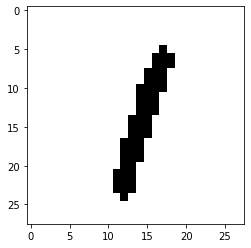

The Model Thinks This is not a 5
313/313 [==============================] - 0s 910us/step


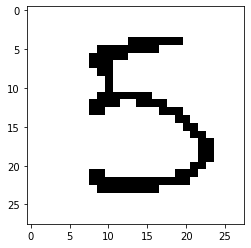

The Model Thinks This is a 5
313/313 [==============================] - 0s 869us/step


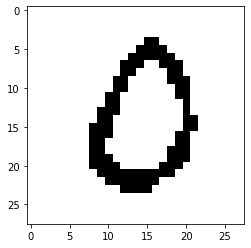

The Model Thinks This is not a 5
313/313 [==============================] - 0s 875us/step


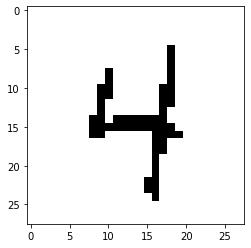

The Model Thinks This is not a 5
313/313 [==============================] - 0s 1ms/step


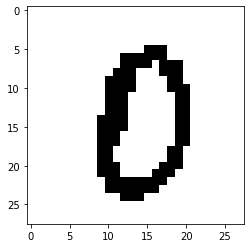

The Model Thinks This is not a 5
313/313 [==============================] - 0s 862us/step


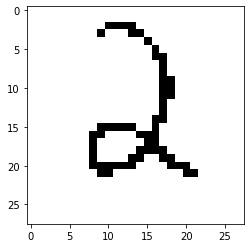

The Model Thinks This is not a 5
313/313 [==============================] - 0s 874us/step


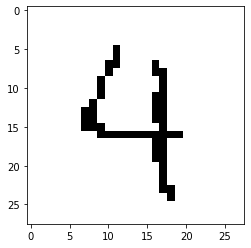

The Model Thinks This is not a 5
313/313 [==============================] - 0s 861us/step


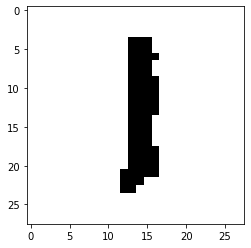

The Model Thinks This is not a 5
313/313 [==============================] - 0s 1ms/step


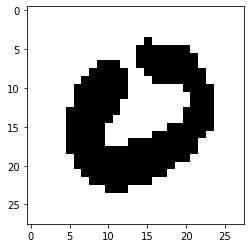

The Model Thinks This is not a 5
313/313 [==============================] - 0s 897us/step


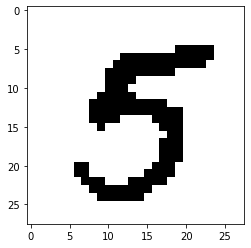

The Model Thinks This is a 5


In [95]:
def tester():
 for i in range(10):
  nbr = int(input())
  prediction = model.predict(reformed_x_test)
  prediction[nbr]
  plt.imshow(x_test[nbr], cmap='gray')
  plt.show()
  if (prediction[nbr]> 0.5):

     print("The Model Thinks This is a 5")
  else:
     print("The Model Thinks This is not a 5")
   
tester()